<a href="https://colab.research.google.com/github/ardilalukita14/Magang-Kominfo/blob/main/Mining_Finishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Package yang Dibutuhkan**

In [1]:
!pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.3 MB/s 


In [3]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 7.6 MB/s 
     |████████████████████████████████| 93 kB 2.7 MB/s 
     |████████████████████████████████| 81 kB 12.2 MB/s 
     |████████████████████████████████| 7.4 MB 21.2 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=a8c2d774271ebf545fbd9cbefaab9d4fc51264a83f9f87fa0433dda0e167e287
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=cde0d3b8c3613206a63b4721e3ea370afd8629129311c25bfed7d0c72b1fe794
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=f4966b1117fcfc52ba372f85760cf01512abcf53e6c01da3

In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Akses File Stop Words**

In [6]:
f = open("stop words.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

774

## **Import Library yang Dibutuhkan**

In [7]:
import pandas as pd
import json
import datetime
import pprint
import requests
from newsapi.newsapi_client import NewsApiClient
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## **Input Keyword**

In [95]:
# API 
secret = "12fd31f62amshe0539f78a152f87p11c739jsn89c9f491b99e"

# Definisikan endpoint yang akan digunakan untuk mengakses google news
url = 'https://google-news.p.rapidapi.com/v1/search'

# Definisikan atribut di dalam parameters
parameters = {
	'q': input('Masukkan keyword yang diinginkan : '), 
  'country': 'ID', 
  'lang': 'id',
	#'pageSize': 100, # maximum is 100
	#'apiKey': secret # your own API key
}

# Definiskan headers yang akan di proses dalam API
headers= {
    'X-RapidAPI-Key': secret,
    'X-RapidAPI-Host': 'google-news.p.rapidapi.com'
  }
# Make the request
response = requests.get(url,
						params = parameters, headers=headers)

# Convert the response to
# JSON format and pretty print it
# response_json = response.json()
# pprint.pprint(response_json)
# news_data = save_dict('q')
# save_to_csv(news_data)

Masukkan keyword yang diinginkan : walikota


## **Proses Stemmer dan Word Count**

In [96]:
import matplotlib.pyplot as plt
response_json = response.json()

text_combined = '' 
factory = StemmerFactory()
stemmer = factory.create_stemmer()

for i in response_json['articles']:
	
	if stemmer.stem(i['title']) != None:
		text_combined += stemmer.stem(i['title']) + ' '
		
wordcount={}
for word in text_combined.split():
	if word not in wordcount:
		wordcount[word] = 1
	else:
		wordcount[word] += 1

for k,v, in sorted(wordcount.items(),
				key=lambda words: words[1],
				reverse = True):
	print(k,v)


- 104
walikota 93
kota 34
dan 22
perintah 19
pekanbaru 16
di 14
pj 14
com 12
wakil 9
surabaya 9
id 8
hadir 7
solo 7
akan 7
indonesia 6
semarang 6
ini 6
kalong 6
resmi 6
pimpin 6
tribun 6
jadi 5
sama 5
masyarakat 5
provinsi 5
raya 5
bahas 5
menteri 5
anak 5
harga 4
hasil 4
2022 4
tingkat 4
lantik 4
co 4
malang 4
beri 4
baik 4
hari 4
dengan 4
pasar 4
menara 4
terima 4
halloriau 4
jabat 4
kunjung 4
plt 4
kemenag 4
padang 4
dprd 4
irsan 3
efendi 3
nasution 3
news 3
satu 3
rmol 3
silaturahmi 3
ajak 3
raih 3
kepala 3
opd 3
tegas 3
sutiaji 3
surabayapost 3
layan 3
batam 3
budaya 3
aaf 3
tak 3
lurah 3
ingat 3
yang 3
laku 3
evaluasi 3
rusuh 3
tidak 3
anggota 3
buka 3
kerja 3
program 3
wali 3
jawa 3
barat 3
wisata 3
minta 3
eri 3
temu 3
tinjau 3
untuk 3
agama 3
baru 3
paripurna 3
palangka 3
tanjungbalai 3
kaltim 3
medan 3
bogor 3
sumsel 3
santri 2
infakta 2
tuju 2
kali 2
camat 2
piala 2
suara 2
online 2
aman 2
kualitas 2
portal 2
sukabumi 2
bagi 2
nota 2
humas 2
polri 2
kantor 2
sk 2
semangat 2


## **Stop Words**

In [98]:
import nltk
import ssl
nltk.download('punkt')
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
r = text_combined.replace('\s+',
						' ').replace(',',
									' ').replace('.',
													' ')
words = r.split()
rst = [word for word in words if
	( word.lower() not in stopword_list
		and len(word) > 3) ]

rst = ' '.join(rst)

wordcount={}

for word in rst.split():
	
	if word not in wordcount:
		wordcount[word] = 1
	else:
		wordcount[word] += 1

for k,v, in sorted(wordcount.items(),
				key=lambda words: words[1],
				reverse = True):
	print(k,v)


walikota 93
kota 34
perintah 19
pekanbaru 16
wakil 9
surabaya 9
hadir 7
solo 7
indonesia 6
semarang 6
kalong 6
resmi 6
pimpin 6
tribun 6
masyarakat 5
provinsi 5
raya 5
bahas 5
menteri 5
anak 5
harga 4
hasil 4
2022 4
tingkat 4
lantik 4
malang 4
pasar 4
menara 4
terima 4
halloriau 4
jabat 4
kunjung 4
kemenag 4
padang 4
dprd 4
irsan 3
efendi 3
nasution 3
news 3
rmol 3
silaturahmi 3
ajak 3
raih 3
kepala 3
sutiaji 3
surabayapost 3
layan 3
batam 3
budaya 3
lurah 3
laku 3
evaluasi 3
rusuh 3
anggota 3
buka 3
kerja 3
program 3
wali 3
jawa 3
barat 3
wisata 3
temu 3
tinjau 3
agama 3
paripurna 3
palangka 3
tanjungbalai 3
kaltim 3
medan 3
bogor 3
sumsel 3
santri 2
infakta 2
tuju 2
kali 2
camat 2
piala 2
suara 2
online 2
aman 2
kualitas 2
portal 2
sukabumi 2
nota 2
humas 2
polri 2
kantor 2
semangat 2
didik 2
launching 2
baca 2
jasa 2
raharja 2
banten 2
jaya 2
negara 2
ringtimes 2
wujud 2
liput 2
kendal 2
makassar 2
kafilah 2
dumai 2
bangun 2
pandemi 2
lhokseumawe 2
aceh 2
akselerasi 2
sambut 2
koper

## **Olah File CSV**

In [100]:
output = response.json()

In [101]:
articles = output['articles']

In [102]:
df = pd.DataFrame(articles)
df

,id,title,link,published,sub_articles,source
0,CAIiEKnie_5B9Fp_cSkKhTJPGbwqGQgEKhAIACoHCAow27...,Walikota Irsan Efendi Nasution Hadiri Penamata...,https://infakta.com/walikota-irsan-efendi-nasu...,"Thu, 28 Jul 2022 16:49:00 GMT",[],"{'href': 'https://infakta.com', 'title': 'Infa..."
1,CBMikQFodHRwczovL251c2FudGFyYS5ybW9sLmlkL3JlYW...,"Jadi Salah Satu Tokoh Berpengaruh Indonesia, W...",https://nusantara.rmol.id/read/2022/07/29/5418...,"Thu, 28 Jul 2022 19:55:00 GMT",[],"{'href': 'https://nusantara.rmol.id', 'title':..."
2,CAIiEGNBQ4TOwjmZ40He0jgj7zEqGQgEKhAIACoHCAow27...,Walikota Irsan Efendi Nasution : “Hasil Panen ...,https://infakta.com/walikota-irsan-efendi-nasu...,"Thu, 28 Jul 2022 16:49:00 GMT",[],"{'href': 'https://infakta.com', 'title': 'Infa..."
3,CBMiiQFodHRwczovL3d3dy5wZWthbmJhcnUuZ28uaWQvcC...,Silaturahmi Bersama Masyarakat Kecamatan Limap...,https://www.pekanbaru.go.id/p/news/silaturahmi...,"Thu, 28 Jul 2022 08:05:15 GMT",[],"{'href': 'https://www.pekanbaru.go.id', 'title..."
4,CBMiaWh0dHBzOi8vc3VhcmFwZW1lcmludGFoLmlkLzIwMj...,"SBA 2022, Walikota Pekalongan sabet penghargaa...",https://suarapemerintah.id/2022/07/sba-2022-wa...,"Thu, 28 Jul 2022 06:32:59 GMT",[],"{'href': 'https://suarapemerintah.id', 'title'..."
...,...,...,...,...,...,...
91,CBMid2h0dHBzOi8vd3d3LmRldGlrcGVyaXN0aXdhLmNvbS...,“Rekom PDI P Dan Kader BMI Papua Barat Untuk P...,https://www.detikperistiwa.com/news-444536/rek...,"Wed, 27 Jul 2022 00:36:12 GMT",[],"{'href': 'https://www.detikperistiwa.com', 'ti..."
92,CBMieGh0dHBzOi8vcG9saXRpay5ybW9sLmlkL3JlYWQvMj...,KPK Periksa Tenaga Ahli KSP Terkait Kasus Koru...,https://politik.rmol.id/read/2022/07/14/540196...,"Thu, 14 Jul 2022 07:00:00 GMT",[],"{'href': 'https://politik.rmol.id', 'title': '..."
93,CBMikwFodHRwczovL3d3dy5pbmZvc3Vtc2VsLmlkL3N1bX...,Penyebab Walikota Palembang Sebut Pegawai Pemk...,https://www.infosumsel.id/sumsel-raya/pr-36239...,"Fri, 22 Jul 2022 11:59:00 GMT",[],"{'href': 'https://www.infosumsel.id', 'title':..."
94,CBMiZ2h0dHBzOi8vd3d3LnN1YXJhbnRiLmNvbS8yMDIyLz...,"Festival Sungai Jangkok, Walikota Minta Lurah ...",https://www.suarantb.com/2022/07/25/festival-s...,"Mon, 25 Jul 2022 01:11:42 GMT",[],"{'href': 'https://www.suarantb.com', 'title': ..."


## **Export Files To CSV**

In [103]:
df.to_csv(input('Masukkan nama file CSV : '), index=False)

Masukkan nama file CSV : walikota.csv


## **CSV StopWord**

In [104]:
df = pd.DataFrame({'StopWords': [rst]})

In [105]:
df.to_csv(input('Masukkan nama file CSV : '), index=False)

Masukkan nama file CSV : stopwords3.csv


## **JOIN Dataset**

In [106]:
d1 = pd.read_csv(input('masukkan nama file 1 : '))
d2 = pd.read_csv(input('masukkan nama file 2 : '))
d3 = pd.read_csv(input('masukkan nama file 3 : '))
#d4 = pd.read_csv(input('masukkan nama file 4 : '))
#d5 = pd.read_csv(input('masukkan nama file 5 : '))
frames = [d1, d2, d3] 
result = pd.concat(frames).drop_duplicates().reset_index(drop=True)

masukkan nama file 1 : stopwords.csv
masukkan nama file 2 : stopwords2.csv
masukkan nama file 3 : stopwords3.csv


In [108]:
result.to_csv(input('Masukkan nama file hasil joining : '), index=False)

Masukkan nama file hasil joining : join.csv


In [109]:
df2 = input("Upload file CSV: ")
df3 = pd.read_csv(df2)
df3

Upload file CSV: join.csv


,StopWords
0,tutup 2022 kota madiun juara lomba madiuntoday...
1,maidi rombak jabat realita wali kota maidi duk...
2,walikota irsan efendi nasution hadir tamat san...


## **Output (Word Cloud)**

Masukkan file: join.csv


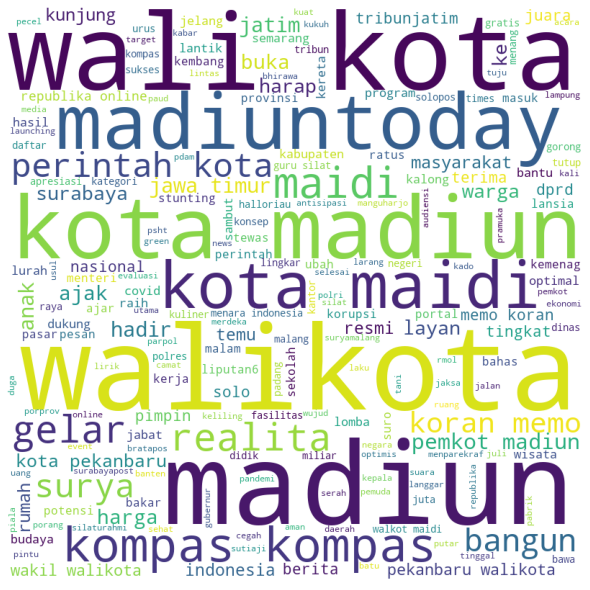

In [110]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv((input('Masukkan file: ')), encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.StopWords:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()